# Hola Kanon! <a class="tocSkip"></a>

Mi nombre es Oscar Flores y tengo el gusto de revisar tu proyecto. Si tienes algún comentario que quieras agregar en tus respuestas te puedes referir a mi como Oscar, no hay problema que me trates de tú.

Si veo un error en la primera revisión solamente lo señalaré y dejaré que tú encuentres de qué se trata y cómo arreglarlo. Debo prepararte para que te desempeñes como especialista en Data, en un trabajo real, el responsable a cargo tuyo hará lo mismo. Si aún tienes dificultades para resolver esta tarea, te daré indicaciones más precisas en una siguiente iteración.

Te dejaré mis comentarios más abajo - **por favor, no los muevas, modifiques o borres**

Comenzaré mis comentarios con un resumen de los puntos que están bien, aquellos que debes corregir y aquellos que puedes mejorar. Luego deberás revisar todo el notebook para leer mis comentarios, los cuales estarán en rectángulos de color verde, amarillo o rojo como siguen:

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien! Toda la respuesta fue lograda satisfactoriamente.
</div>

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Existen detalles a mejorar. Existen recomendaciones.
</div>

<div class="alert alert-block alert-danger">

<b>Comentario de Reviewer</b> <a class="tocSkip"></a>

Se necesitan correcciones en el bloque. El trabajo no puede ser aceptado con comentarios en rojo sin solucionar.
</div>

Cualquier comentario que quieras agregar entre iteraciones de revisión lo puedes hacer de la siguiente manera:

<div class="alert alert-block alert-info">
<b>Respuesta estudiante.</b> <a class="tocSkip"></a>
</div>

Mucho éxito en el proyecto!

## Resumen de la revisión 1 <a class="tocSkip"></a>

<div class="alert alert-block alert-danger">
<b>Comentario de Revisor</b> <a class="tocSkip"></a>

Buen trabajo Kanon, has completado el notebook de forma correcta. En general está todo bastante bien, pero debes trabajar en diferenciar por colores las series de los gráficos. Si están del mismo color, se confunden y no se sabe cuál es cual. En especial para la última parte dónde graficas las distribuciones de las features para cada clúster. Te dejé un comentario para mejorar aquello.    
    
Saludos!

</div>

## Resumen de la revisión 2 <a class="tocSkip"></a>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v</b> <a class="tocSkip"></a>

Bien hecho Kanon, has completado correctamente todo lo necesario del notebook. No tengo comentarios de corrección adicionales, está aprobado.

Saludos!

</div>

----

# Importar librerias

In [3]:
#Importar librerias
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import numpy as np
#Algoritmos que se usaran como modelo y herramientas para estos mismos
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.tree import DecisionTreeClassifier
from sklearn.preprocessing import StandardScaler
from scipy.cluster.hierarchy import dendrogram, linkage
from sklearn.ensemble import RandomForestClassifier, GradientBoostingClassifier
from sklearn.cluster import KMeans
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score
from sklearn.metrics import roc_auc_score
from sklearn.metrics import silhouette_score

# Descargar datos

In [4]:
#Descargar datos
df = pd.read_csv('/datasets/gym_churn_us.csv')

# Visualizar y procesar los datos

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4000 entries, 0 to 3999
Data columns (total 14 columns):
 #   Column                             Non-Null Count  Dtype  
---  ------                             --------------  -----  
 0   gender                             4000 non-null   int64  
 1   Near_Location                      4000 non-null   int64  
 2   Partner                            4000 non-null   int64  
 3   Promo_friends                      4000 non-null   int64  
 4   Phone                              4000 non-null   int64  
 5   Contract_period                    4000 non-null   int64  
 6   Group_visits                       4000 non-null   int64  
 7   Age                                4000 non-null   int64  
 8   Avg_additional_charges_total       4000 non-null   float64
 9   Month_to_end_contract              4000 non-null   float64
 10  Lifetime                           4000 non-null   int64  
 11  Avg_class_frequency_total          4000 non-null   float

In [6]:
#Arreglaremos las columnas segun el metodo "snake_case", y las mayusculas las convertiremos a minusculas.
df.columns = df.columns.str.lower()
 
print(df.columns)

Index(['gender', 'near_location', 'partner', 'promo_friends', 'phone',
       'contract_period', 'group_visits', 'age',
       'avg_additional_charges_total', 'month_to_end_contract', 'lifetime',
       'avg_class_frequency_total', 'avg_class_frequency_current_month',
       'churn'],
      dtype='object')


<div class="alert alert-block alert-success">
<b>Comentario de Revisor v</b> <a class="tocSkip"></a>

Bien, el uso de snakecase siempre es bienvenido

</div>

## Análisis exploratorio de datos (EDA)

### Datos ausentes y duplicados

In [7]:
#Podemos ver que no hay datos ausentes observando la informacion que nos proporciona el metodo "info()"
#De todas formas confirmaremos si hay datos ausentes:
df.isna().sum()

gender                               0
near_location                        0
partner                              0
promo_friends                        0
phone                                0
contract_period                      0
group_visits                         0
age                                  0
avg_additional_charges_total         0
month_to_end_contract                0
lifetime                             0
avg_class_frequency_total            0
avg_class_frequency_current_month    0
churn                                0
dtype: int64

In [8]:
#confirmamos que no tenga datos duplicados
df.duplicated().sum()

0

Podemos confirmar que no existan datos ausentes ni duplicados en el DataFrame.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v</b> <a class="tocSkip"></a>

Ok, correcta esta verificación, la data parece venir ya tratada.

</div>

### Ver promedio y desviacion estandar de todos los datos

In [9]:
# Veamos los valores promedio y la desviación estándar de los datos.
df.describe()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
count,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000,4000.000000
mean,0.510250,0.845250,0.486750,0.308500,0.903500,4.681250,0.412250,29.184250,146.943728,4.322750,3.724750,1.879020,1.767052,0.265250
std,0.499957,0.361711,0.499887,0.461932,0.295313,4.549706,0.492301,3.258367,96.355602,4.191297,3.749267,0.972245,1.052906,0.441521
min,0.000000,0.000000,0.000000,0.000000,0.000000,1.000000,0.000000,18.000000,0.148205,1.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,27.000000,68.868830,1.000000,1.000000,1.180875,0.963003,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,1.000000,0.000000,29.000000,136.220159,1.000000,3.000000,1.832768,1.719574,0.000000
75%,1.000000,1.000000,1.000000,1.000000,1.000000,6.000000,1.000000,31.000000,210.949625,6.000000,5.000000,2.536078,2.510336,1.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,12.000000,1.000000,41.000000,552.590740,12.000000,31.000000,6.023668,6.146783,1.000000


Gracias al metodo describe tenemos los valores promedio y desviacion estandar, algo muy interesante para ver en primera instancia los datos, sobretodo teniendo en cuenta que todas nuestras variables son numericas, lo cual nos quiere decir que el promedio y la desviacion estandar nos dan mucha informacion a cerca del comportamiento de nuestros datos. Para las columnas en que su informacion es de caracter binario (0 o 1) el promedio estara siempre entre estos dos numeros, siendo el numero flotante resultante el que nos indique como se comportan los, si esta mas cerca del "0" o si del "1". En cambio las columnas que no son binarias nos indicaran sus valores promedio, como por ejemplo el promedio de edad es de: 29.184250.
A su vez con la desviacion estandar podemos ver la medida de la dispersión del un conjunto de datos. La desviacion estandar nos muestra el número que indica qué tan lejos están los datos de la media. Siendo el complemento perfecto para hacer una buena apreciacion de estos datos numericos.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v</b> <a class="tocSkip"></a>

Bien hecho, podemos ver que la data tiene cierta variabilidad de donde podríamos encontrar puntos claves para clusterizar.

</div>

### Ver valores medios para los grupos(clientes actuales y los que cancelaron)

In [10]:
#Veamos los valores medios para los grupos de clientes que se quedaron y los que abandonaron
churn_per_groups = df.groupby("churn").mean().reset_index()
churn_per_groups

,churn,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
0,0,0.510037,0.873086,0.534195,0.353522,0.903709,5.747193,0.464103,29.976523,158.445715,5.283089,4.711807,2.024876,2.027882
1,1,0.510839,0.768143,0.355325,0.183789,0.902922,1.728558,0.268615,26.989632,115.082899,1.662582,0.990575,1.474995,1.044546


Gracias a ver las medias de las caracteristicas entre estos dos grupos, podemos ver que el grupo de los que se quedaron saca ventajas al de cancelacion, tenemos caracteristicas que sobresalen o al menos le sacan una ventaja considerable, por ejemplo los que se quedaron tienen un mayor indice promedio de vivir cerca, tambien tienen mayor indice de usar la "promo amigos" es decir que no van solos, tambien hay mas que usan el descuento "partner", firman contratos mas largos, etc.
Sin  duda podemos apreciar que hay caracteristicas que nos pueden dar informacion valiosa para saber o pronosticar si un cliente se queda o si se va.

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v</b> <a class="tocSkip"></a>

Muy bien, efectivamente, las medias calculadas aquí nos van mostrando cuáles podrían ser las features claves para clusterizar la data de forma correcta.

</div>

### Trazar histogramas de distribucion por caracteristicas para los grupos

In [84]:
# Función para trazar histogramas

def histogramas(x, group_col, key_col):
    x_new = x.copy()
    x_new[key_col] = df[key_col]
    
    # Generar una lista de colores aleatorios
    unique_groups = x[group_col].unique()
    colors = np.random.rand(len(unique_groups), 3)  # Genera colores RGB aleatorios

    for i in key_col:
        plt.figure()  # Crear una nueva figura para cada histograma
        for idx, cl in enumerate(unique_groups):
            sns.histplot(x_new[x_new[group_col] == cl][i], 
                         label='{} = {}'.format(group_col, str(cl)), 
                         bins=20, 
                         kde=True, 
                         color=colors[idx])  # Asignar color aleatorio
        plt.title(i)
        plt.legend(title=group_col, labels=["No cancelación", "Cancelación"])
        plt.show()

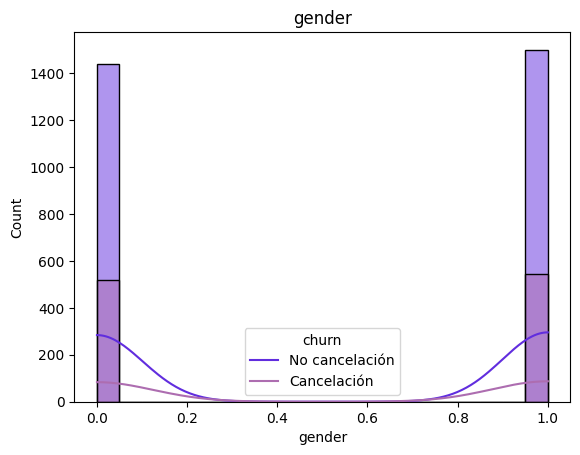

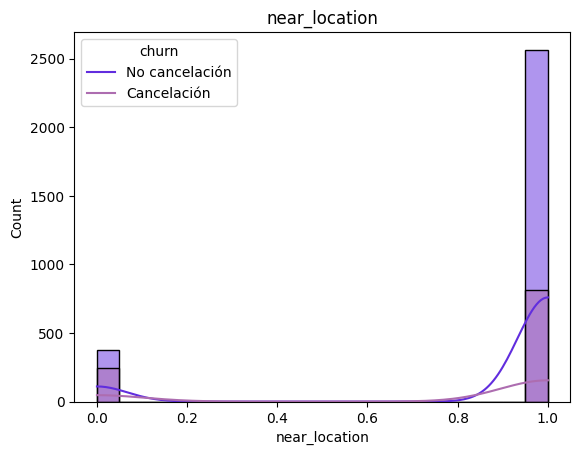

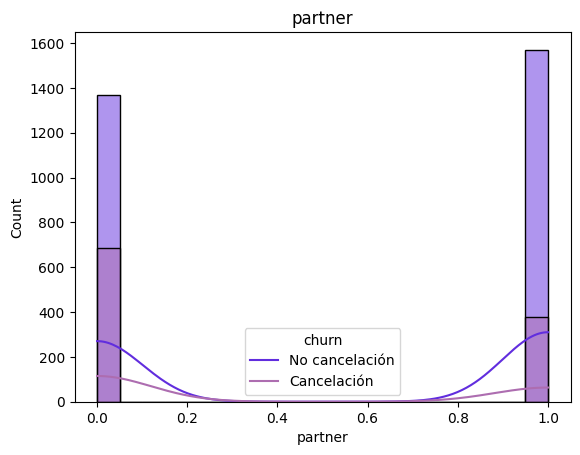

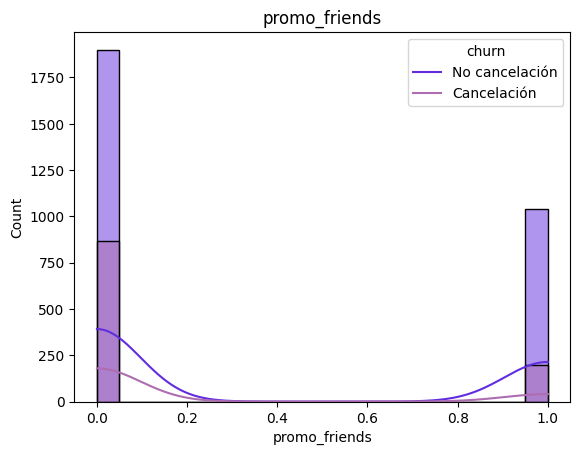

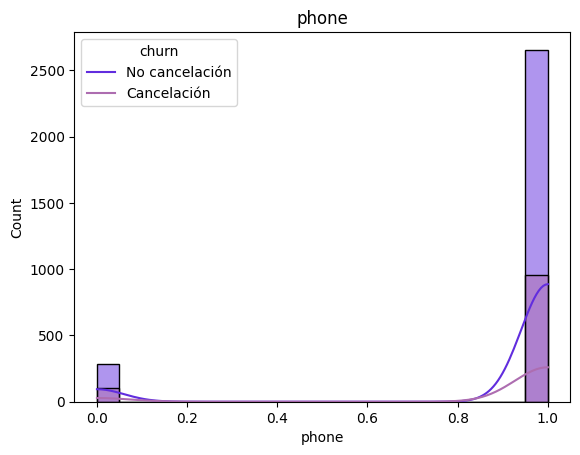

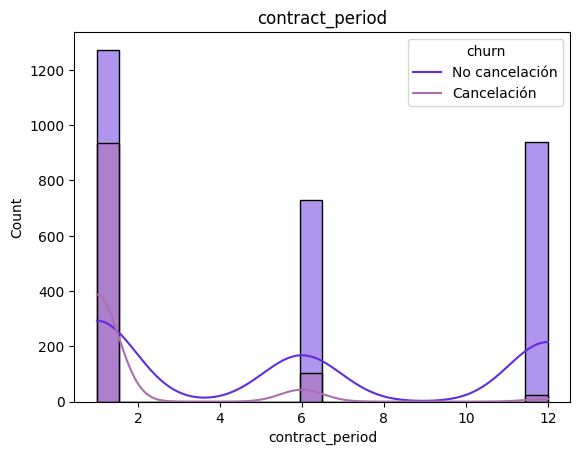

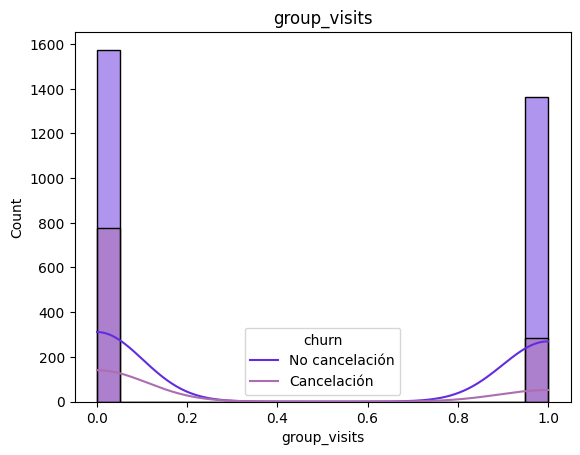

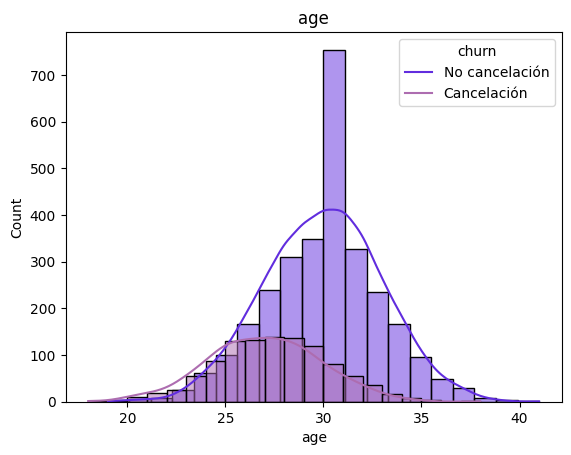

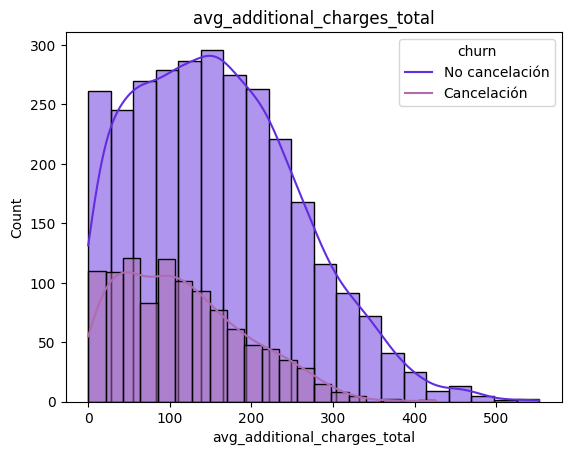

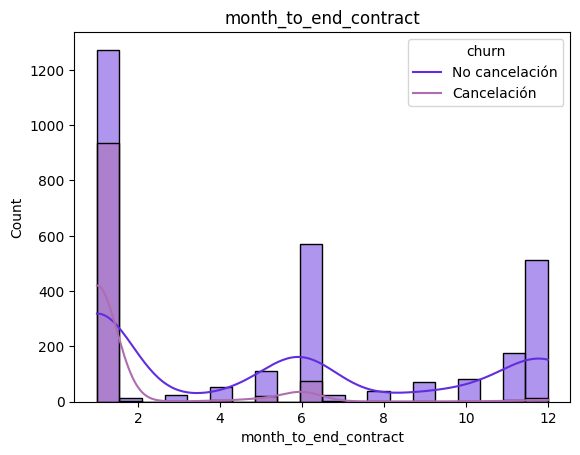

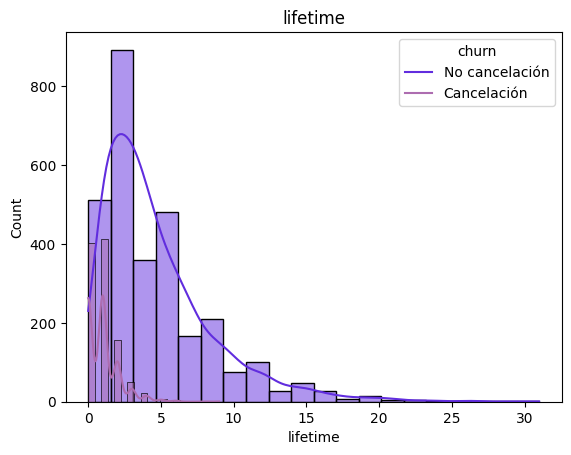

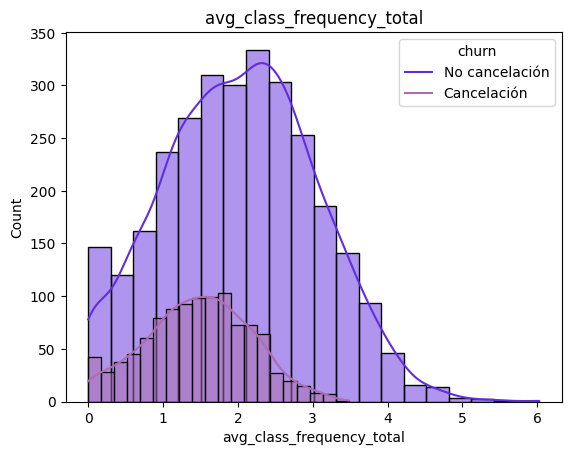

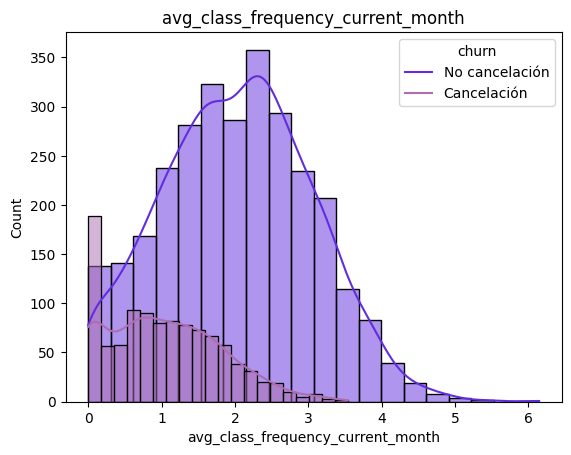

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


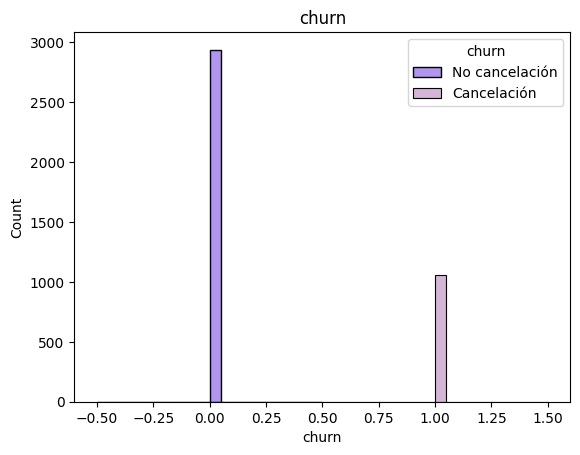

In [85]:
#Usemos la funcion que acabamos de crear
histogramas(df, 'churn', df.columns)

Podemos ver los histogramas para cada caracteristica y ver la distribucion entre los usuarios que cancelaron y los que no.

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien con los gráficos de distribución de cada variable. Podemos ver algunas diferencias entre churn y no churn, aunque como tienen colores iguales no se pueden distinguir.
</div>

No pude cambiar el color de los histograma para que sea mas descripctivo, no entiendo bien el porque.. pero en los graficos se puede ver que los de cancelacion son mas oscuros que los que no lo son. 

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
El bucle que usaste grafica con el mismo color cada vez. Con histplot puedes usar el parámetro `color=` para seleccionar un color. Dentro del bucle podrías seleccionar un color para churn=1 y otro para churn=0.
</div>

### Crea una matriz de correlación y muéstrala.

In [13]:
#ver la correlacion entre las columnas
df.corr()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
gender,1.000000,0.006699,-0.010463,-0.005033,-0.008542,0.000502,0.017879,0.013807,-0.009334,-0.001281,0.013579,0.014620,0.009156,0.000708
near_location,0.006699,1.000000,-0.005119,0.210964,-0.015763,0.150233,0.154728,0.058358,0.040761,0.143961,0.070921,0.043127,0.062664,-0.128098
partner,-0.010463,-0.005119,1.000000,0.451960,0.009970,0.306166,0.022710,0.047480,0.022941,0.294632,0.061229,0.024938,0.045561,-0.157986
promo_friends,-0.005033,0.210964,0.451960,1.000000,0.001982,0.244552,0.120170,0.050113,0.036898,0.239553,0.072721,0.028063,0.053768,-0.162233
phone,-0.008542,-0.015763,0.009970,0.001982,1.000000,-0.006893,-0.010099,-0.011403,0.009279,-0.011196,-0.018801,0.008340,0.013375,-0.001177
contract_period,0.000502,0.150233,0.306166,0.244552,-0.006893,1.000000,0.169991,0.138249,0.111445,0.973064,0.170725,0.096211,0.159407,-0.389984
group_visits,0.017879,0.154728,0.022710,0.120170,-0.010099,0.169991,1.000000,0.080934,0.032079,0.163703,0.075853,0.056695,0.075923,-0.175325
age,0.013807,0.058358,0.047480,0.050113,-0.011403,0.138249,0.080934,1.000000,0.080240,0.134511,0.164693,0.119953,0.183095,-0.404735
avg_additional_charges_total,-0.009334,0.040761,0.022941,0.036898,0.009279,0.111445,0.032079,0.080240,1.000000,0.113958,0.079028,0.044426,0.079570,-0.198697
month_to_end_contract,-0.001281,0.143961,0.294632,0.239553,-0.011196,0.973064,0.163703,0.134511,0.113958,1.000000,0.161078,0.085387,0.147605,-0.381393


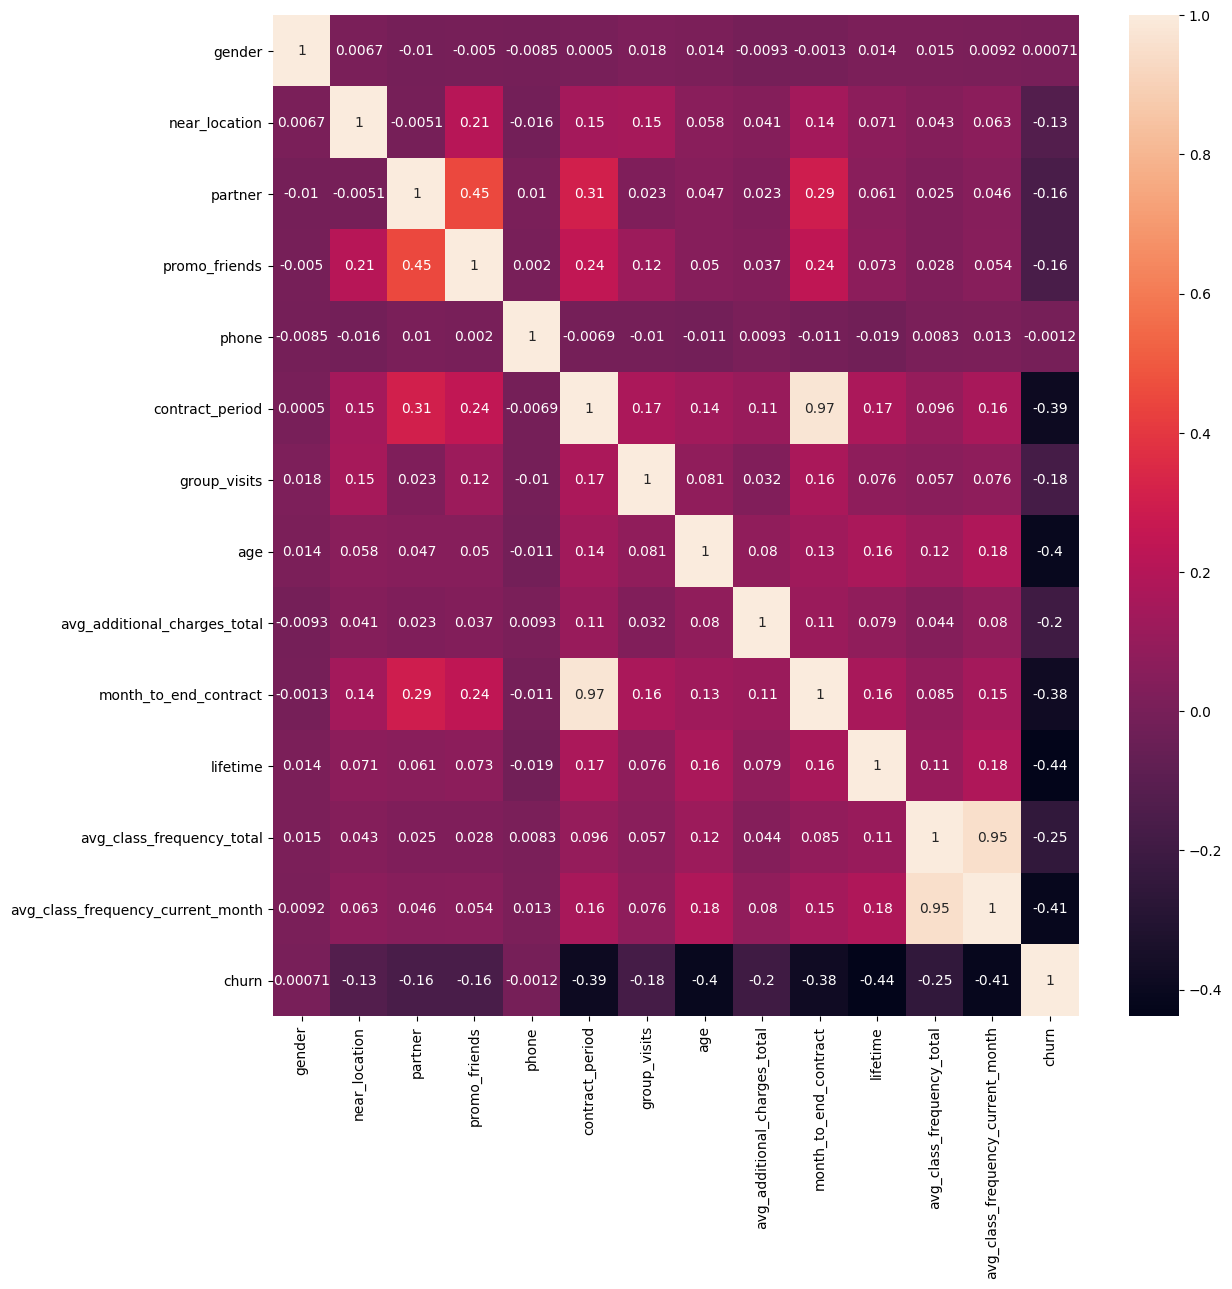

In [14]:
#Hacer un mapa de calor entre las correlaciones
plt.figure(figsize=(13,13))
sns.heatmap(df.corr(), annot=True)
plt.show()

Podemos ver que hay dos correlaciones llamativas solamente entre todas, y son entre caracteristicas que tiene sentido que tengan cierta relacion.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Bien, correcto con el cálculo de la matriz de correlación
</div>

## Construir un modelo para predecir la cancelación de usuarios

Crea un modelo de clasificación binaria para clientes donde la característica objetivo es la marcha del usuario o la usuaria el mes siguiente.

### Divide los datos en conjuntos de entrenamiento y validación utilizando la función train_test_split().

In [15]:
#Primero dividimos los datos en características (la matriz X) y una variable objetivo (y)
X = df.drop('churn', axis=1)
y = df['churn']

In [16]:
#Dividimos los datos en entrenamiento(train) y prueba(test)
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

In [17]:
#Veemos la magnitudes de nuestras matriz
print(X_train.shape)
print(X_test.shape)

(3200, 13)
(800, 13)


* Vamos a entrenar nuestros modelos con 3200(80%) datos.
* Vamos a validar  nuestros modelos con 800(20%) datos.

In [18]:
X_train.describe().loc["mean"]

gender                                 0.507500
near_location                          0.851562
partner                                0.484375
promo_friends                          0.313437
phone                                  0.909062
contract_period                        4.698437
group_visits                           0.418125
age                                   29.124688
avg_additional_charges_total         147.210349
month_to_end_contract                  4.332813
lifetime                               3.731562
avg_class_frequency_total              1.881084
avg_class_frequency_current_month      1.764464
Name: mean, dtype: float64

Podemos ver que en nuestros datos de entrenamiento que hay datos que no estan a la misma escala. Por lo cual hay que "escalarlos" o "estandarizarlos"

In [19]:
#Entrena StandardScaler en el conjunto de entrenamiento
scaler = StandardScaler()
scaler.fit(X_train)

StandardScaler()

In [20]:
#transforma conjuntos de entrenamiento y de prueba
X_train_st = scaler.transform(X_train)
X_test_st = scaler.transform(X_test)

In [21]:
X_train.describe().loc["mean"]

gender                                 0.507500
near_location                          0.851562
partner                                0.484375
promo_friends                          0.313437
phone                                  0.909062
contract_period                        4.698437
group_visits                           0.418125
age                                   29.124688
avg_additional_charges_total         147.210349
month_to_end_contract                  4.332813
lifetime                               3.731562
avg_class_frequency_total              1.881084
avg_class_frequency_current_month      1.764464
Name: mean, dtype: float64

In [22]:
#Ver el modelo de entrenamiento estandarizado
print(X_train_st[:10])

[[-1.01511421  0.4175068   1.03175391  1.4800097   0.31628211  1.60502986
  -0.84769226  0.57944798  0.37161711  1.59173796  1.12734972  1.75580418
   1.61822807]
 [-1.01511421  0.4175068  -0.96922337 -0.67567125  0.31628211 -0.81299073
  -0.84769226  0.27046055 -1.09697378 -0.79568246  5.88138322 -0.2239674
  -0.01340886]
 [ 0.98511083  0.4175068   1.03175391 -0.67567125  0.31628211  1.60502986
  -0.84769226 -0.65650171 -1.18374157  1.83048     0.3350108  -0.84308456
  -0.80541199]
 [-1.01511421  0.4175068   1.03175391  1.4800097   0.31628211  0.28610954
  -0.84769226 -0.96548914 -0.95158829  0.39802775  1.39146269  0.66771379
   0.64605224]
 [-1.01511421  0.4175068  -0.96922337 -0.67567125 -3.16173427 -0.81299073
  -0.84769226 -0.03852687  0.97190435 -0.79568246  0.07089783 -0.19587934
  -0.16038147]
 [ 0.98511083  0.4175068   1.03175391  1.4800097   0.31628211  1.60502986
  -0.84769226  1.19742282  0.26317299  1.35299592  0.59912377  0.31406032
   0.4371122 ]
 [ 0.98511083  0.417506

### Entrena el modelo en el set de entrenamiento con dos métodos:

#### Regresión Logística

In [23]:
# Definimos el algoritmo del modelo
lr_model = LogisticRegression(random_state=0)

In [24]:
#Entrenar el modelo
lr_model.fit(X_train_st, y_train)

LogisticRegression(random_state=0)

In [25]:
# define la función que podrá generar nuestras métricas
def print_all_metrics(y_true, y_pred, y_proba, title = 'Métricas de clasificación'):
    print(title)
    print('\tAccuracy(Exactitud): {:.2f}'.format(accuracy_score(y_true, y_pred)))
    print('\tPrecision: {:.2f}'.format(precision_score(y_true, y_pred)))
    print('\tRecall: {:.2f}'.format(recall_score(y_true, y_pred)))
    #print('\tF1: {:.2f}'.format(f1_score(y_true, y_pred)))
    #print('\tROC_AUC: {:.2f}'.format(roc_auc_score(y_true, y_proba)))


In [26]:
# utiliza el modelo entrenado para hacer previsiones
lr_predictions = lr_model.predict(X_test_st)
lr_probabilities = lr_model.predict_proba(X_test_st)[:,1]
# muestra todas las métricas llamando a la funcion que creamos
print_all_metrics(y_test, lr_predictions, lr_probabilities , title='Métricas de regresión logística:')

Métricas de regresión logística:
	Accuracy(Exactitud): 0.92
	Precision: 0.85
	Recall: 0.83


#### Bosque Aleatorio

In [27]:
# define el algoritmo para el nuevo modelo de random forest
rf_model = RandomForestClassifier(n_estimators = 100, random_state = 0)
# entrena el modelo de random forest
rf_model.fit(X_train_st, y_train)
# utiliza el modelo entrenado para hacer previsiones
rf_predictions = rf_model.predict(X_test_st)
rf_probabilities = rf_model.predict_proba(X_test_st)[:,1]
# muestra todas las métricas
print_all_metrics(y_test, rf_predictions, rf_probabilities, title='Métricas de Bosque Aleatorio:')

Métricas de Bosque Aleatorio:
	Accuracy(Exactitud): 0.92
	Precision: 0.84
	Recall: 0.81


### ¿Qué modelo dio mejores resultados?

Nos dieron mejores resultados a las metricas elegidas en el modelo de regresion lineal, 

<div class="alert alert-block alert-warning">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Ok, bien con el entrenamiento de los modelos, pero no probaste diferentes parámetros para random forest, es importante variar un poco hiperparámetros como la profundidad o cantidad de estimadores.
</div>

Muchas gracias tutor, ya arregle el tema de los colores en ambos casos pero me tomo mucho tiempo, estuve al menos un par de horas tratando de arreglarlo me tomaba muchos errores fue una lucha. Por esta vez solo alcanzo a corregir los errores marcados en rojo que eran mi prioridad en estos momentos de poco tiempo

##  Crear clústeres de usuarios/as

### Estandarizacion

In [28]:
#Crearemos una copia del df para trabajar e irla modificando sin alterar el df original
df_gym = df.copy()
df_gym = df_gym.drop(columns = ["churn"]) #Eliminamos la columna con datos sobre la cancelación

In [29]:
#Estandarizemos los datos
scaler = StandardScaler() # crear un objeto de clase scaler (normalizador)
x_sc = scaler.fit_transform(df_gym) # entrenar el normalizador y transformar el conjunto de datos

In [30]:
print(x_sc[:10])

[[ 0.97970588  0.42788074  1.02686062  1.49716101 -3.05985201  0.28989014
   1.19403206 -0.0565538  -1.37753121  0.16160501 -0.19332863 -1.91191971
  -1.67847198]
 [-1.0207145   0.42788074 -0.973842   -0.66793083  0.32681319  1.60882159
   1.19403206  0.55732732 -0.35021325  1.83194105  0.87368001  0.04517569
   0.1360137 ]
 [-1.0207145   0.42788074  1.02686062 -0.66793083  0.32681319 -0.8092194
  -0.83749845 -0.36349436 -0.1815923  -0.79287273 -0.46008079 -0.02049263
  -0.02901851]
 [-1.0207145   0.42788074  1.02686062  1.49716101  0.32681319  1.60882159
   1.19403206  1.17120844 -0.87472237  1.83194105 -0.46008079  1.36465509
   1.51045005]
 [ 0.97970588  0.42788074  1.02686062  1.49716101  0.32681319 -0.8092194
  -0.83749845 -0.97737548  0.5336998  -0.79287273 -0.19332863 -0.78707638
  -0.61454183]
 [ 0.97970588  0.42788074 -0.973842   -0.66793083  0.32681319 -0.8092194
   1.19403206  1.478149    3.15330097 -0.79287273 -0.19332863  0.76580519
   0.82634551]
 [ 0.97970588  0.42788074

### Distancia de Clusteres

In [31]:
#Usamos la función linkage() para crear una matriz de distancias basada en la matriz de características estandarizada
linked = linkage(x_sc, method = 'ward')

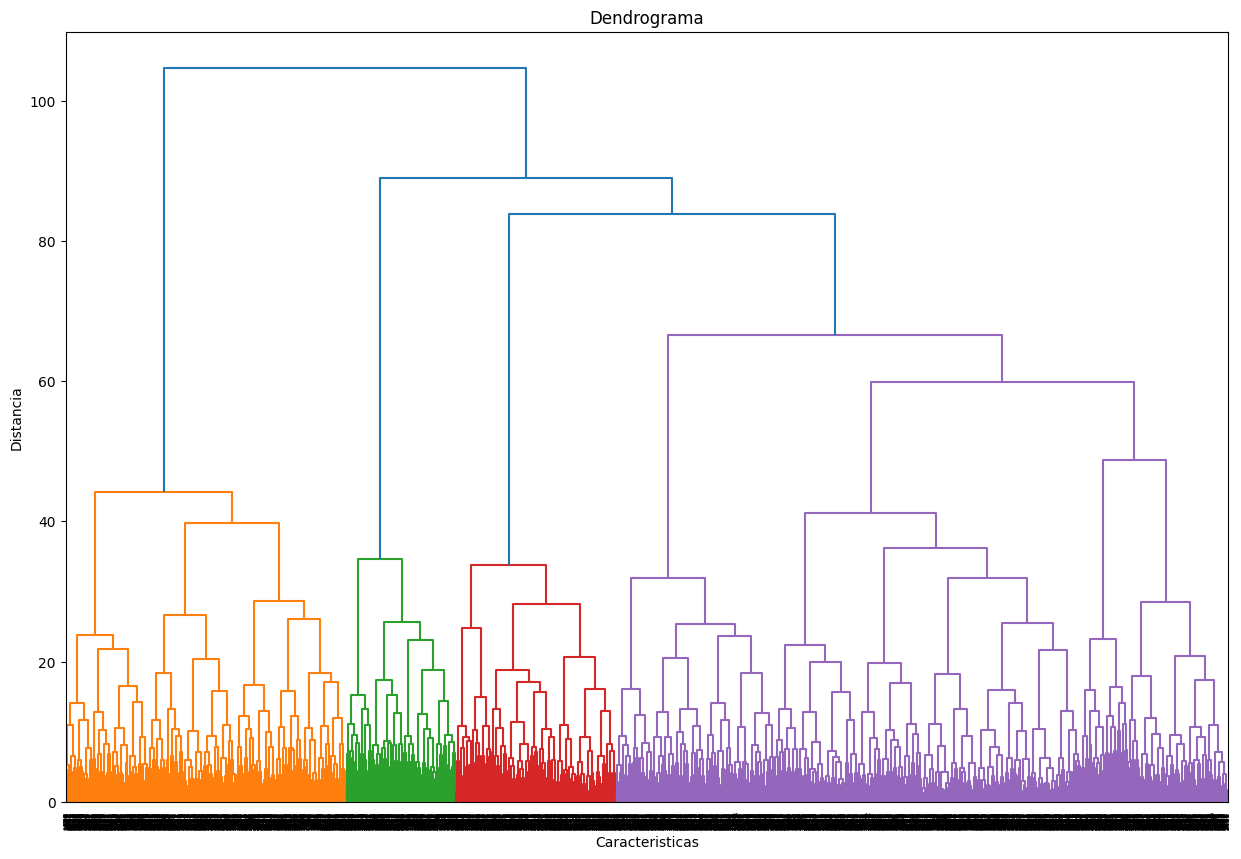

In [32]:
#Y trazar un dendrograma
plt.figure(figsize=(15, 10))
dendrogram(linked, orientation='top', distance_sort='ascending', show_leaf_counts=True)
plt.title('Dendrograma')
plt.xlabel('Caracteristicas')
plt.ylabel('Distancia')
plt.show()

Con el denograma podemos ver el numero de "clusters" que usaremos para aplicar el metodo "KMeans".
En este caso podriamos hacer entre 4 y 5 clusters. Por recomendacion de las instrucciones lo haremos con 5 clusters.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Correcto, muy bien. La cantidad de clústers a utilizar es normalmente muy subjetivo y depende del objetivo de la segmentación que se quiere realizar.
</div>

### KMeans

In [33]:
#establecer el número de clústeres en 5
km = KMeans(n_clusters = 5) 
#aplicar el algoritmo a los datos y formar un vector de clúster
labels = km.fit_predict(x_sc) 
#almacena etiquetas de clúster en el campo de nuestro conjunto de datos
df_gym['cluster_km'] = labels
# obtiene las estadísticas de los valores medios de las características por clúster
df_gym.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month
cluster_km,,,,,,,,,,,,,
0,0.500577,0.936563,0.739331,0.479815,1.0,11.847751,0.547866,29.891580,163.507327,10.792388,4.700115,2.005008,1.996759
1,0.486574,0.715216,0.301871,0.017087,1.0,1.912937,0.275020,28.098454,129.614364,1.820179,2.203417,1.228598,0.972313
2,0.555305,0.854402,0.260722,0.054176,1.0,2.617381,0.439052,30.002257,159.859649,2.436795,4.783296,2.751157,2.738793
3,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967
4,0.498418,0.949367,0.825949,0.998418,1.0,3.068038,0.446203,29.109177,141.484176,2.870253,3.729430,1.763513,1.661428


### En los valores medios por clusters. ¿Hay algo que llame la atención?

Llama la atencion la diversidad de valores por clusteres. Ya que por clusteres hay una gran variedad en algunos valores y no tantas en otras. A demas de agregar el caracter aleatorio de "KMeans" ya que cada vez que corremos el codigo cambian los valores pero la estimacion general por clusteres se mantiene.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Muy bien, correcto. En particular deberíamos graficar las distribuciones para notar de forma más clara qué tan diferentes son los clúster.
</div>

### Al trazar distribuciones de características para los clústeres. ¿Notas algo? .

In [80]:
def histo(x, group_col, key_col):
    x_new = x.copy()
    x_new[key_col] = df_gym[key_col]
    
    # Generar una lista de colores aleatorios
    unique_groups = x[group_col].unique()
    colors = np.random.rand(len(unique_groups), 3)  # Genera colores RGB aleatorios

    for i in key_col:
        plt.figure()  # Crear una nueva figura para cada histograma
        for cl, color in zip(unique_groups, colors):
            sns.histplot(x_new[x_new[group_col] == cl][i], 
                         label='{} = {}'.format(group_col, str(cl)), 
                         bins=20, 
                         kde=True, 
                         color=color)  # Aplicar color aleatorio
        plt.title(i)
        plt.legend()
        plt.show()

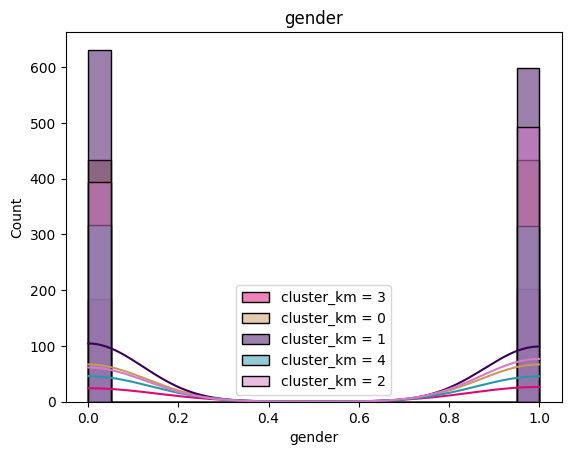

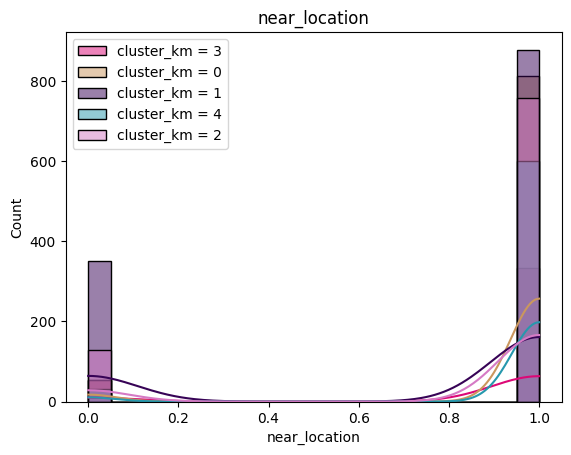

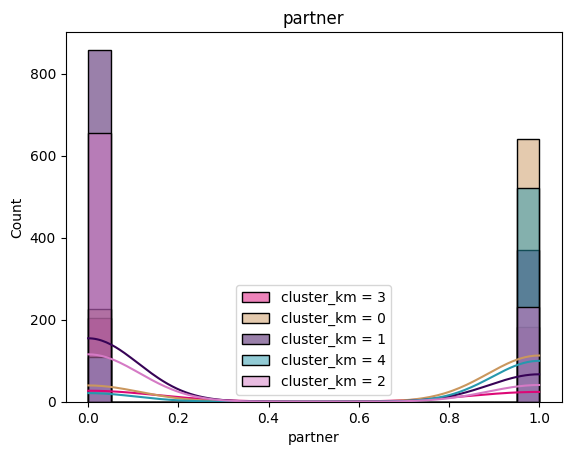

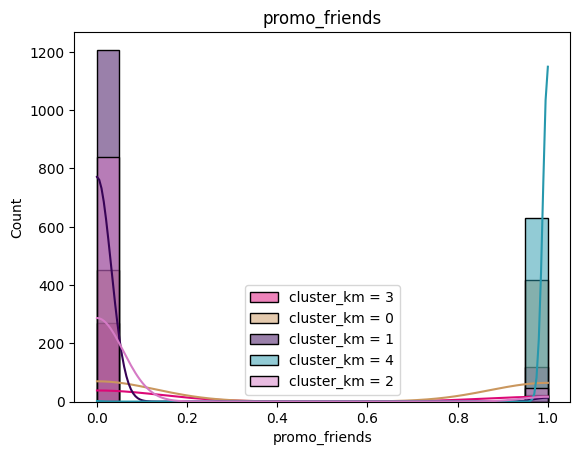

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


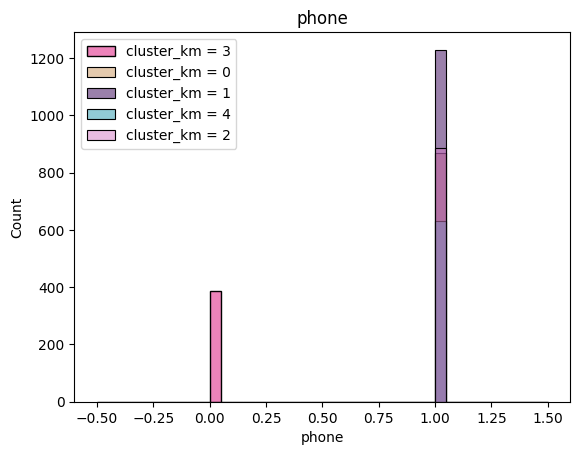

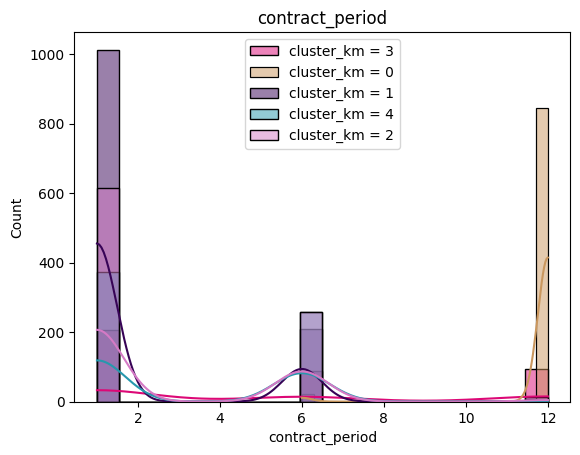

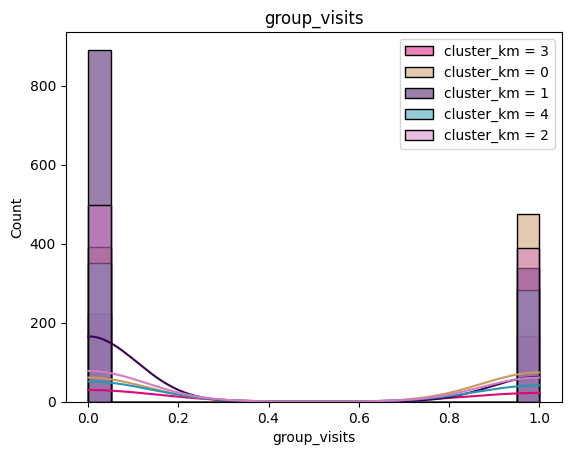

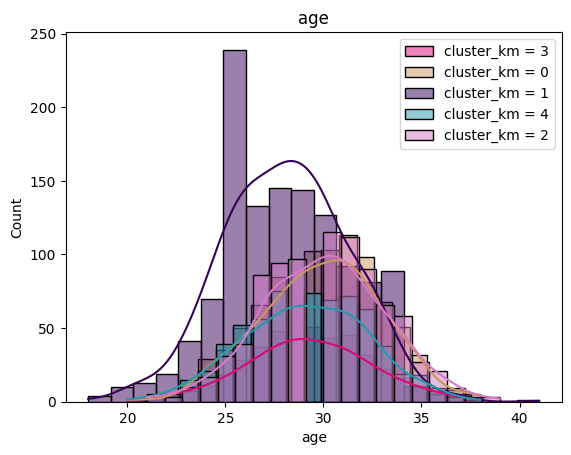

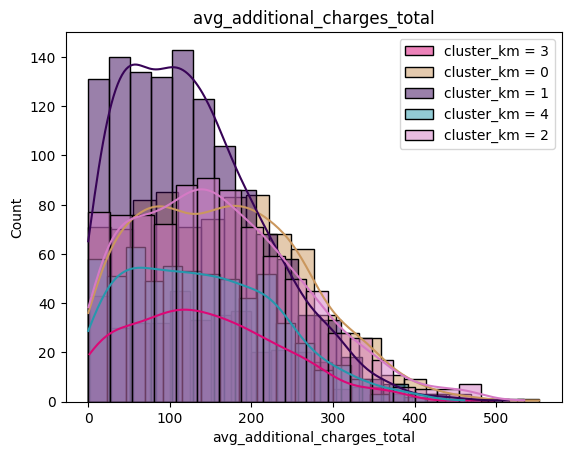

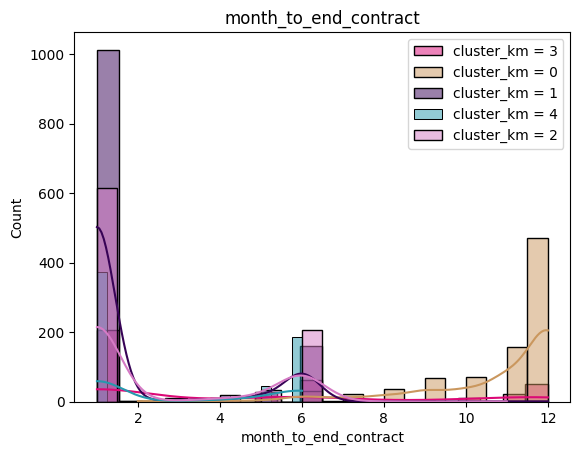

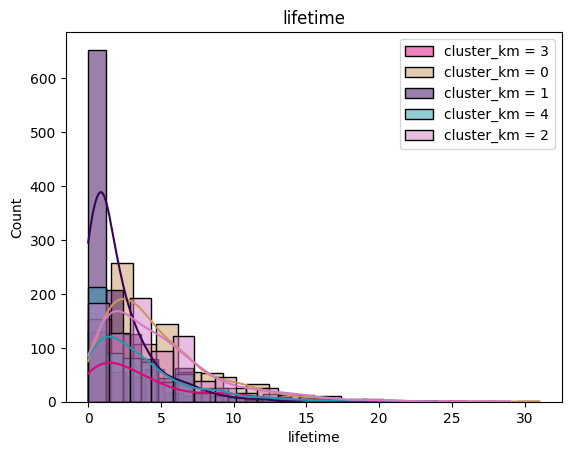

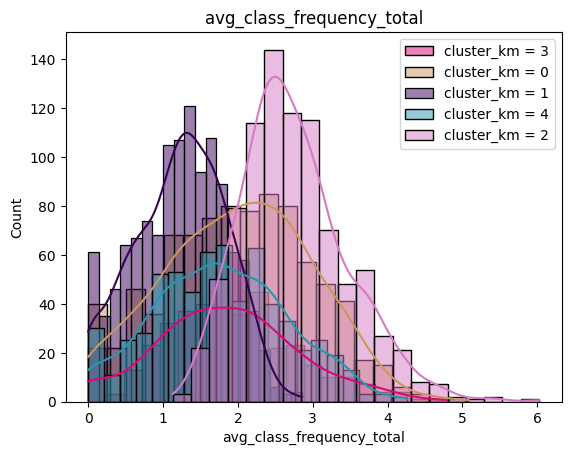

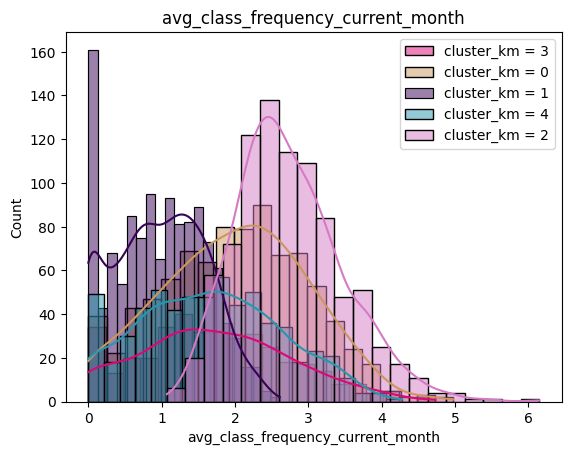

/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)
/opt/conda/envs/python3/lib/python3.9/site-packages/seaborn/distributions.py:306: UserWarning: Dataset has 0 variance; skipping density estimate.
  warnings.warn(msg, UserWarning)


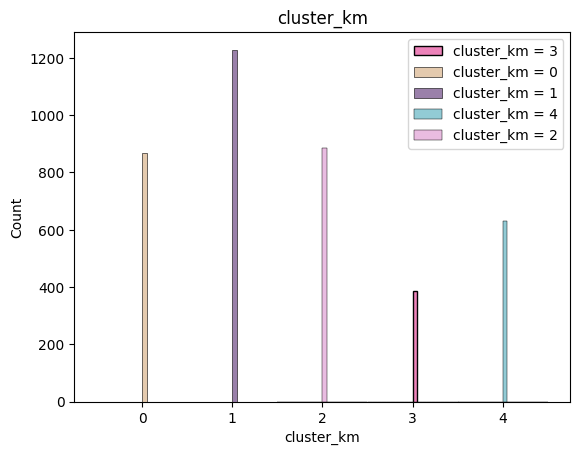

In [81]:
histo(df_gym, 'cluster_km', df_gym.columns)

Aqui hay un histograma de cada una de las caracteristicas en el cual podemos ver como varian los comportamientos entre grupos, podemos ver grupos de clusters, podemos ver comportamientos mas bajos y mas altos en unos que otros, en el siguente paso mostraremos como se comportan las tasas de cancelacion por clusters.

<div class="alert alert-block alert-danger">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Ok, bien con el gráfico, pero aquí sí que se confunden las distribuciones. Como todos tienen el mismo color (lo único que varía es su borde) no podemos decir nada muy particular de cada una. Utiliza el parámetro color para modificarlo según el grupo. Otra solución es iterar sobre las columnas solamente y usar el parámetro hue="cluster_km".
</div>

<div class="alert alert-block alert-success">
<b>Comentario de Revisor v2</b> <a class="tocSkip"></a>

Ok, bien hecho, ahora si tienen colores diferentes. Otra forma de diferenciar los colores con seaborn, es usar un palette específico. Hay algunos que solo usan colores de alto contraste.

</div>

### Calcula la tasa de cancelación para cada clúster

In [34]:
#Creamos una copia de los 
df_2 = df.copy()

In [35]:
#Crear una columna con los indices del clauster
df_2['cluster_km'] = labels

In [36]:
#Mostrar la media de caracteristicas por clusteres
df_2.groupby(['cluster_km']).mean()

,gender,near_location,partner,promo_friends,phone,contract_period,group_visits,age,avg_additional_charges_total,month_to_end_contract,lifetime,avg_class_frequency_total,avg_class_frequency_current_month,churn
cluster_km,,,,,,,,,,,,,,
0,0.501972,0.960552,0.783037,0.573964,1.0,10.887574,0.541420,29.980276,160.794855,9.948718,4.724852,1.996468,1.989661,0.027613
1,0.496063,0.000000,0.460630,0.078740,1.0,2.375984,0.218504,28.486220,135.544499,2.222441,2.811024,1.666510,1.485248,0.440945
2,0.552448,0.979021,0.353147,0.234266,1.0,2.567599,0.469697,30.107226,162.729619,2.367133,5.012821,2.803190,2.798678,0.069930
3,0.523316,0.862694,0.471503,0.305699,0.0,4.777202,0.427461,29.297927,144.208179,4.466321,3.940415,1.854211,1.723967,0.266839
4,0.489465,1.000000,0.351702,0.237439,1.0,1.970016,0.341167,28.140194,130.134484,1.879254,2.316045,1.235179,0.996327,0.523501


In [37]:
#creamos una variable con groupby() para que se muestre solo el promedio de cancelacion por clusteres
cancelation_per_cluster = df_2.groupby("cluster_km")["churn"].mean().reset_index()
cancelation_per_cluster

,cluster_km,churn
0,0,0.027613
1,1,0.440945
2,2,0.069930
3,3,0.266839
4,4,0.523501


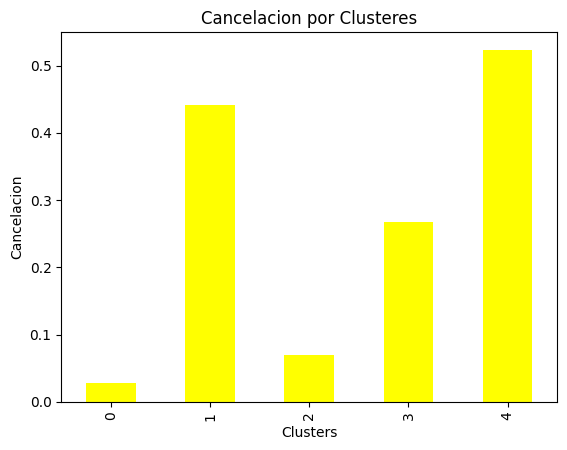

In [38]:
cancelation_per_cluster.plot(kind="bar",
                             x="cluster_km",
                             y="churn",
                             color="yellow",
                             legend=False,
                             ylabel="Cancelacion",
                             xlabel="Clusters",
                             title="Cancelacion por Clusteres")
plt.show()

Aqui podemos ver el los clusters y sus promedios de cancelacion(mas arriba igual lo podemos ver en la variable cancelation_per_cluster) los clusteres que se acercan mas a 1 son los clusteres con mas alto nivel de cancelacion y los que tienen mas cercano a 0 tienen nivel mas bajo de cancelacion, por lo cual podriamos potenciar las caracteristicas que nos proporcionan los clusteres mas cercanos a 0 en la tasa de cancelacion.

<div class="alert alert-block alert-success">
<b>Comentario de Reviewer</b> <a class="tocSkip"></a>
    
Buen trabajo, vemos que la mayoría de los clúster se diferencia por 10% o más en su tasa de cancelación
</div>

## Conclusiones

Podemos concluir que basicamente tenemos a gran escala 4-5(nos decantamos por 5) grupos o clusteres de clientes, de los cuales podemos potenciar su retencion observando los datos que nos proporcionan.

Podemos deducir que la regresion lineal es la mas acertada para poder obtener la informacion requerida y poder modelar, predecir nuestro variable objetivo.

Podemos ver las caracteristicas que nos dejan estudiar los clusteres y las tasas de cancelacion, ya que nos muestran las caracteristicas que estan mas altas en los clientes que tienen mas bajo nivel de cancelacion y tambien las que no. Cosa muy importante, ya que por ejemplo podemos trabajar en un pack para que los clientes vayan con sus amigos y y ofreccer descuentos y promociones, ya que los datos nos indican que suele aumentar la retencion cuando van con acompañados.

Tambien podemos trabajar en el area de mejores contratos y a mas largo plazo, ya que los clientes con mayores contratos suelen ser mas fieles

Implementar 

Solo me dio tiempo de corregir los temas enmarcados en rojos, los enmarcados en amarillo me encantaria corregirlos pero quizas lo arregle para posteriormente subirlo al portafolios por temas de tiempo.